># **<span style="color:#ef233c">Time Series Analysis Of FNIRS</span>**
>- ***<span style="color:#13315c"> Gokul Agrawal | CL24M004<span>*** 
>- ***<span style="color:#13315c"> Shreenandan Sahu | CL24M013<span>***
>- ***<span style="color:#13315c"> K S Suraksha Jain | CL24M015<span>***


>### **<span style="color:#ef233c">Frequency Domain Analysis</span>**


 **<span style="color:teal">Defination**: A time series is a series of data points recorded at different time-intervals. The time series analysis means analyzing the time series data using various statistical tools and techniques.

*<span style="color:#9e0059">In This notebook we will focus on doing the Frequency Domain Analysis. We have tried to do the following analysis.*


- **<span style="color:#e09f3e">Fourier Transform (FT)**:  A mathematical transformation that decomposes a signal into its constituent frequencies.
- **<span style="color:#e09f3e">Power Spectral Density (PSD)**: A function that shows the distribution of power (or variance) across different frequencies in a signal.
- **<span style="color:#e09f3e">Bandpass and Filtering Analysis**: A technique to isolate and examine specific frequency bands of interest within a signal.

*<span style="color:#9e0059">In this notebook we have tried analysing the data using python inbuilt functions and we have also developed our own code to compute the same frequency domain parameter and compared them. Every block of code has an explanation markdown.*



> ### **<span style="color:#ff0054">ABOUT DATA SET**
We have used FNIRS data recorded for ***<span style="Color:#e09f3e">Frontotemporal activation differs between perception of simulated cochlear implant speech and speech in background noise: An image-based fNIRS study*** available at https://data.mendeley.com/datasets/4cjgvyg5p2/1 for the paper https://pmc.ncbi.nlm.nih.gov/articles/PMC8503862/#ABS1 .

Sampled at a ***Sampling Rate of 25 Hz*** the database has collection of data from 28 channels covering the frontotemporal region of the head. The data was recorded for around ***35 minutes***.

For the analysis purpose we have choosen the CH7.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *
from scipy.signal import *

#umber of datapoints of the given data used
row_num=5000

#choosing the desired columns from the 29 columns 28 channels and 1 time column
#loading the data to dataframe of pandas
df=pd.read_csv("DataSet.csv",usecols=["Time","CH7"],nrows=row_num)

#coverting the dataframe to 2D array in python to ease working on it. 
data_main=df.to_numpy()

#print(data_main[:,0]) : is used to represent all values
#print(data_main[0][0]) row,column configuration.


#### <span style="color:#ff0054"> **Ploting The Raw Data**

Using the matplotlib library we will plot the graph of the raw data

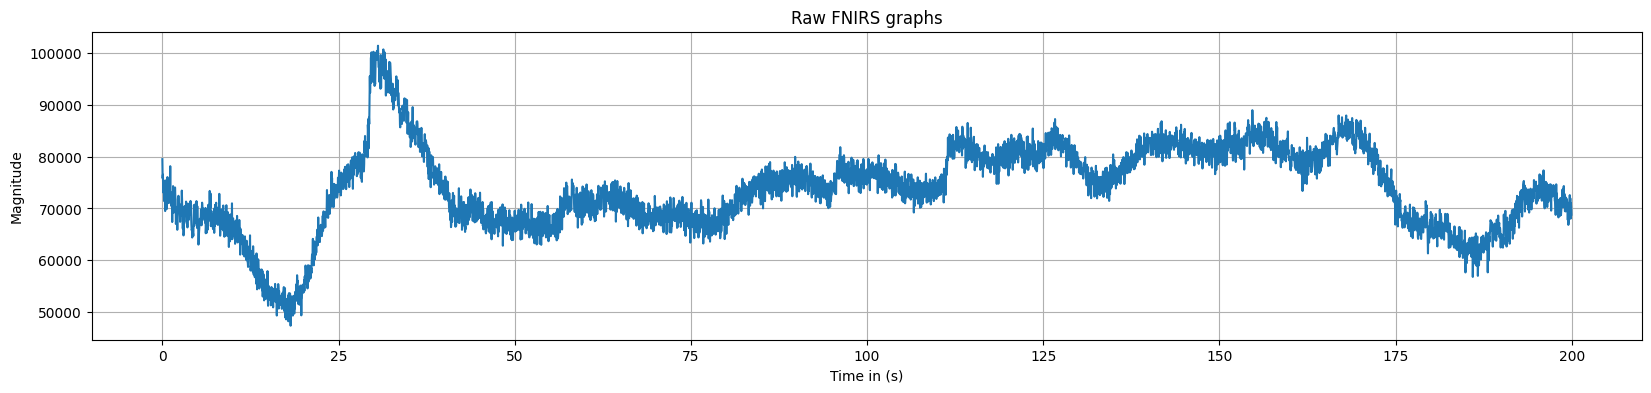

In [2]:
plt.figure(figsize=(20,4))
plt.plot(data_main[:,0],data_main[:,1])
plt.title("Raw FNIRS graphs")
plt.xlabel("Time in (s)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

#### <span style="color:#ff0054"> **Moving Average Filtering**

We will filter the high frequency noise component using moving average filter averaging over n samples. The following code is a function for moving average filter.

In [3]:
def moving_average(data, window):
    num_row = data.size  # Get the total number of elements
    flt_data = np.full(num_row, data.mean())  # Initialize the output array with the mean value of data

    for j in range(window - 1, num_row):
        k = j - (window - 1)
        flt_data[j] = data[k:j + 1].sum() / window  # Calculate the moving average

    return flt_data


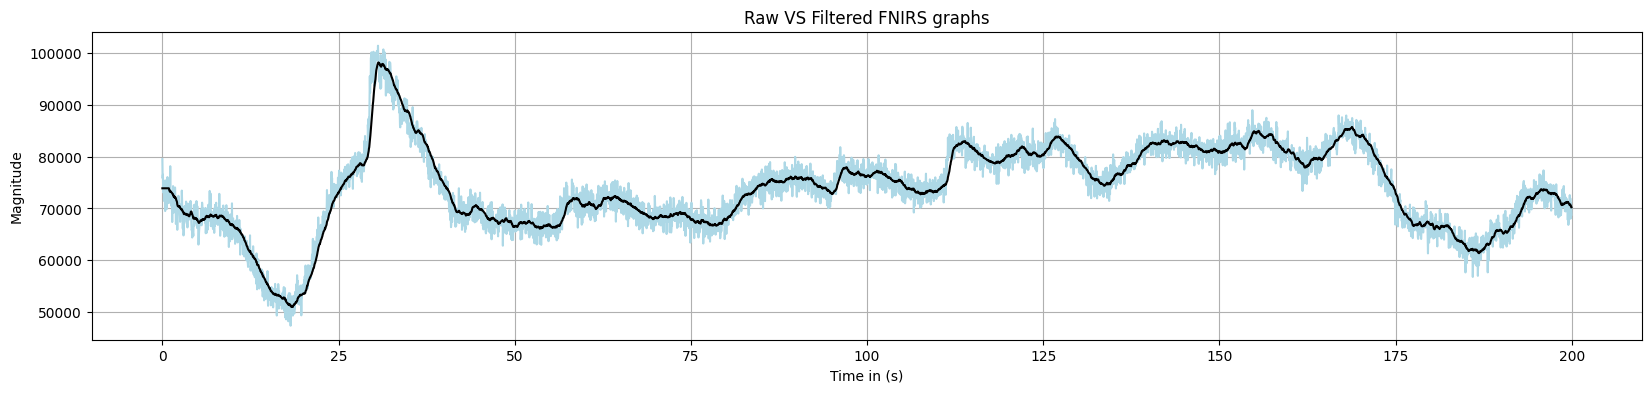

In [4]:
filtered_data=moving_average(data_main[:,1],25)
plt.figure(figsize=(20,4))
plt.plot(data_main[:,0],data_main[:,1], color='lightblue')
plt.plot(data_main[:,0],filtered_data, color='black')
plt.title("Raw VS Filtered FNIRS graphs")
plt.xlabel("Time in (s)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


### ***Finding the Lag***
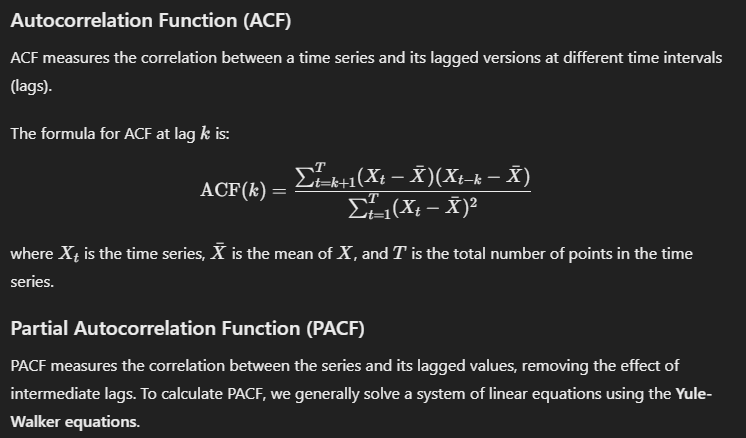

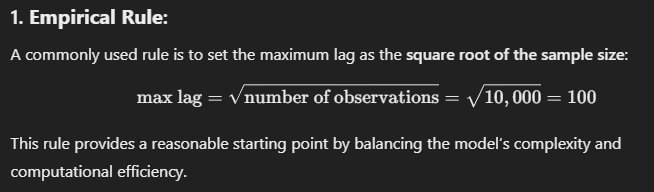

In [5]:
import numpy as np
data=data_main[:,1]

def calculate_acf(data, max_lag):
    """Calculate the ACF up to max_lag."""
    mean_data = np.mean(data)
    n = len(data)
    acf_values = []
    
    for lag in range(max_lag + 1):
        numerator = 0.0
        denominator = 0.0
        
        # Calculate numerator and denominator
        for t in range(lag, n):
            numerator += (data[t] - mean_data) * (data[t - lag] - mean_data)
        for t in range(n):
            denominator += (data[t] - mean_data) ** 2
        
        # ACF at this lag
        acf_values.append(numerator / denominator)
        
    return acf_values

def calculate_pacf(data, max_lag):
    """Calculate the PACF up to max_lag using Yule-Walker equations."""
    pacf_values = [1]  # PACF at lag 0 is always 1
    
    # Use Yule-Walker equations to compute PACF values
    for lag in range(1, max_lag + 1):
        # Create the Toeplitz matrix for the ACF values
        r = calculate_acf(data, lag)[:lag]  # ACF values up to the lag
        R = np.array([[r[abs(i - j)] for j in range(lag)] for i in range(lag)])
        rho = np.array(r)
        
        # Solve the system of linear equations
        pacf_values.append(np.linalg.solve(R, rho)[-1])  # last value is the PACF at current lag
        
    return pacf_values

max_lag = int(np.sqrt(row_num))

# Calculate ACF and PACF
acf_values = calculate_acf(data, max_lag)
pacf_values = calculate_pacf(data, max_lag)

print("ACF Values:", acf_values)
print("PACF Values:", pacf_values)


ACF Values: [1.0, 0.9588217437763761, 0.9577373525522846, 0.95808483155879, 0.9553760321213501, 0.9548650193014163, 0.9529436017534725, 0.9516308652601737, 0.9508700905624258, 0.9485880937647855, 0.9466497879599702, 0.9479390210519094, 0.9459668662240271, 0.945223752606199, 0.9426670869880442, 0.9432430501671333, 0.9424337070022724, 0.9401209753711409, 0.9395348996982466, 0.9391143647775244, 0.9354949549050824, 0.9356278736281052, 0.9341956832725391, 0.9331298604970515, 0.932248907791758, 0.9295356232146608, 0.9282457046073725, 0.9253692325329685, 0.9236404555199803, 0.9208115140167753, 0.9199069671923098, 0.9171543268320335, 0.9142935264441394, 0.9130346966900512, 0.9101615538287651, 0.9074672216073483, 0.905829120928343, 0.902393620361346, 0.9004462929422308, 0.8980653299172733, 0.8968186555874204, 0.8934526984475043, 0.8925153795933634, 0.8890873313190172, 0.8873937711724418, 0.8851073724287492, 0.8834927589258498, 0.8802532504471922, 0.87875960290303, 0.8748971384112336, 0.87271974

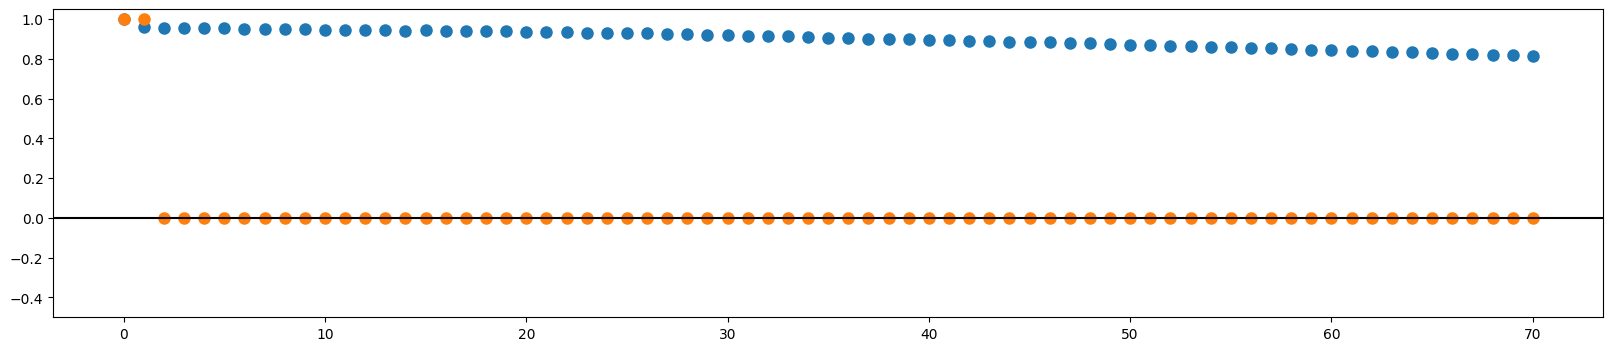

In [6]:
plt.figure(figsize=(20,4))
plt.plot(range(0,max_lag+1,1),acf_values,'o', markersize=8)
plt.plot(range(0,max_lag+1,1),pacf_values,'o', markersize=8)
plt.axhline(y=0,linestyle='solid', color='black')
plt.ylim(-0.5,1.05)
plt.show()

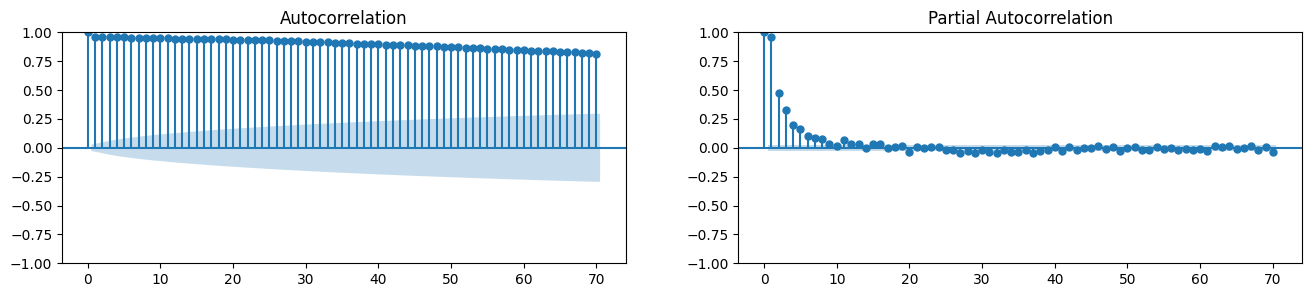

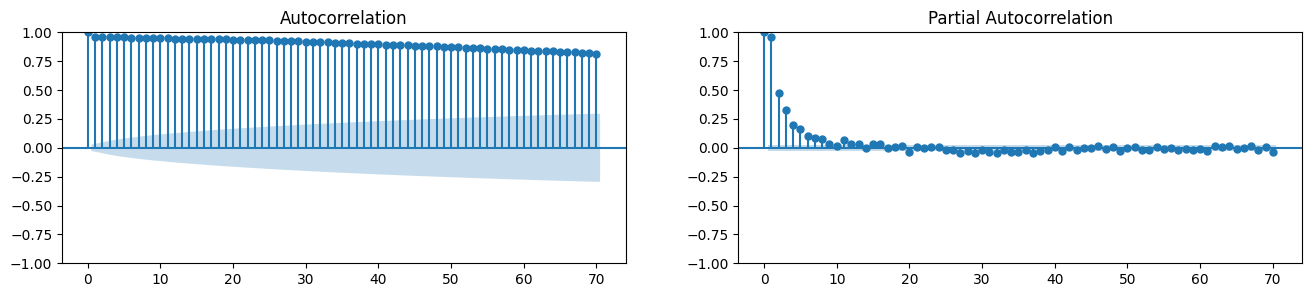

In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data, lags=max_lag, ax=axes[0])
plot_pacf(data, lags=max_lag, ax=axes[1])

1. Set Up Libraries

In [18]:

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


In [40]:
row_num=50000

#choosing the desired columns from the 29 columns 28 channels and 1 time column
#loading the data to dataframe of pandas
df=pd.read_csv("DataSet.csv",usecols=["Time","CH7"],nrows=row_num)

#coverting the dataframe to 2D array in python to ease working on it. 
data_main=df.to_numpy()

In [41]:
# Assuming data_main[:,1] contains your fNIRS data from channel 7
data = pd.Series(data_main[:,1])
train_data, test_data = data[:25000], data[25000:]  # Example split for training/testing


In [46]:
# AR Model
ar_model = AutoReg(train_data, lags=0).fit()  # Adjust lags based on ACF/PACF
print("AR Model Summary:\n", ar_model.summary())


AR Model Summary:
                             AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                25000
Model:                     AutoReg(0)   Log Likelihood             -274665.435
Method:               Conditional MLE   S.D. of innovations          14295.196
Date:                Thu, 31 Oct 2024   AIC                         549334.869
Time:                        11:15:24   BIC                         549351.122
Sample:                             0   HQIC                        549340.130
                                25000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.158e+04     90.411    902.346      0.000    8.14e+04    8.18e+04


In [24]:
# MA Model
ma_model = ARIMA(train_data, order=(0, 0, 5)).fit()  # MA model where AR=0, d=0, MA=5
print("MA Model Summary:\n", ma_model.summary())


MA Model Summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4000
Model:                 ARIMA(0, 0, 5)   Log Likelihood              -37615.693
Date:                Thu, 31 Oct 2024   AIC                          75245.385
Time:                        11:05:25   BIC                          75289.443
Sample:                             0   HQIC                         75261.003
                               - 4000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.428e+04    217.745    341.136      0.000    7.39e+04    7.47e+04
ma.L1          0.8806      0.014     62.442      0.000       0.853       0.908
ma.L2          0.9445      0.017 

In [25]:
# ARMA Model
arma_model = ARIMA(train_data, order=(2, 0, 2)).fit()  # Adjust lags based on data
print("ARMA Model Summary:\n", arma_model.summary())


ARMA Model Summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4000
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -35771.430
Date:                Thu, 31 Oct 2024   AIC                          71554.861
Time:                        11:05:35   BIC                          71592.625
Sample:                             0   HQIC                         71568.247
                               - 4000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.428e+04   4300.196     17.274      0.000    6.59e+04    8.27e+04
ar.L1          1.4307      0.379      3.779      0.000       0.689       2.173
ar.L2         -0.4316      0.37

In [26]:
# ARIMA Model
arima_model = ARIMA(train_data, order=(2, 1, 2)).fit()  # d=1 for differencing if trend
print("ARIMA Model Summary:\n", arima_model.summary())


ARIMA Model Summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4000
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -35915.804
Date:                Thu, 31 Oct 2024   AIC                          71841.608
Time:                        11:05:44   BIC                          71873.077
Sample:                             0   HQIC                         71852.764
                               - 4000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8738      0.042    -20.721      0.000      -0.956      -0.791
ar.L2          0.0267      0.008      3.466      0.001       0.012       0.042
ma.L1          0.1454      0.0

In [38]:
def plot_predictions(test_data, model, title=""):
    predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
    plt.figure(figsize=(20, 5))
    plt.plot(test_data, label="True Values", color='blue')
    plt.plot(predictions, label="Predictions", color='red')
    plt.title(f"{title} Predictions vs Actual")
    plt.legend()
    plt.show()
    return predictions


In [33]:
from sklearn.metrics import mean_squared_error

def evaluate_model(test_data, predictions, model_name="Model"):
    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    print(f"{model_name} RMSE: {rmse:.4f}")

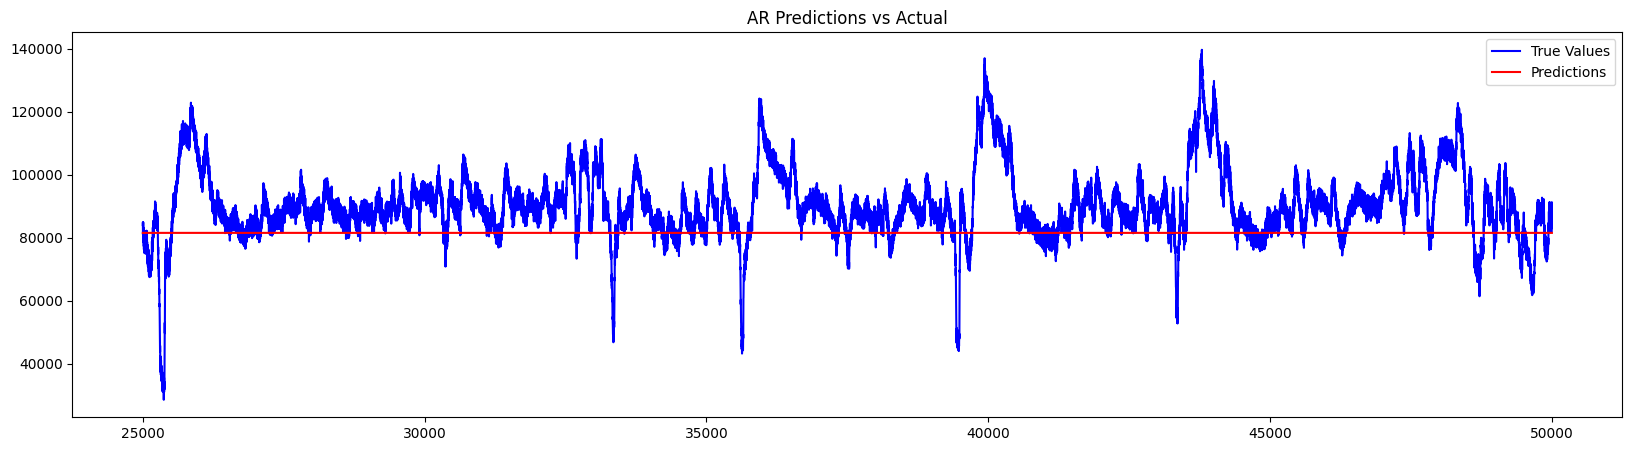

AR Model RMSE: 14215.0295


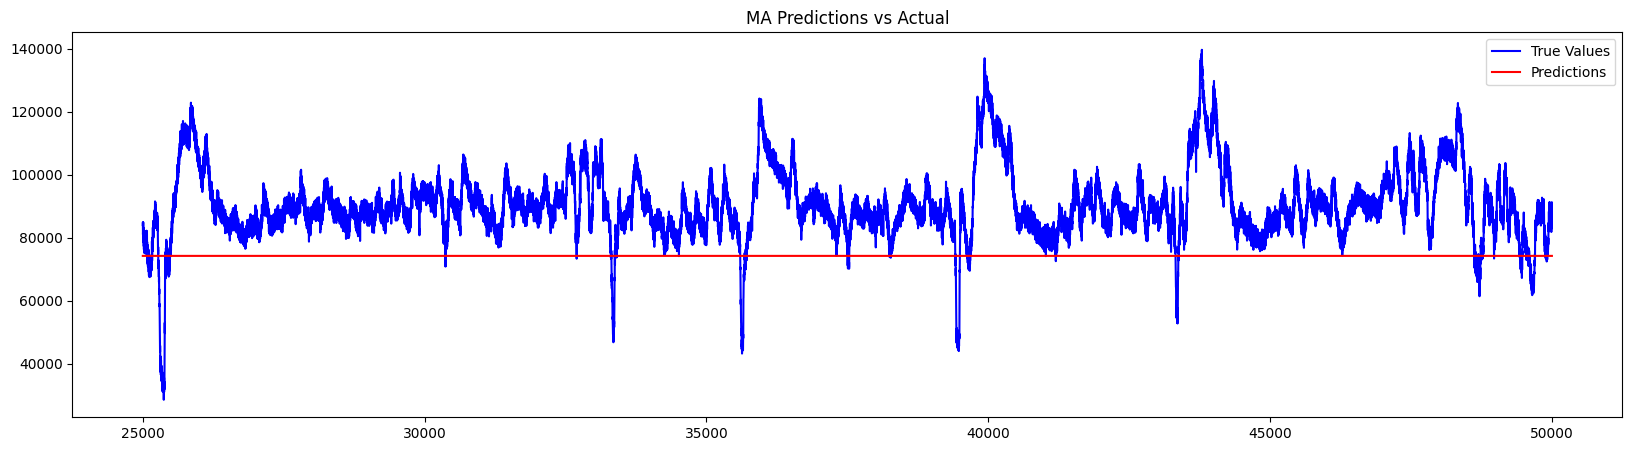

MA Model RMSE: 19589.6570


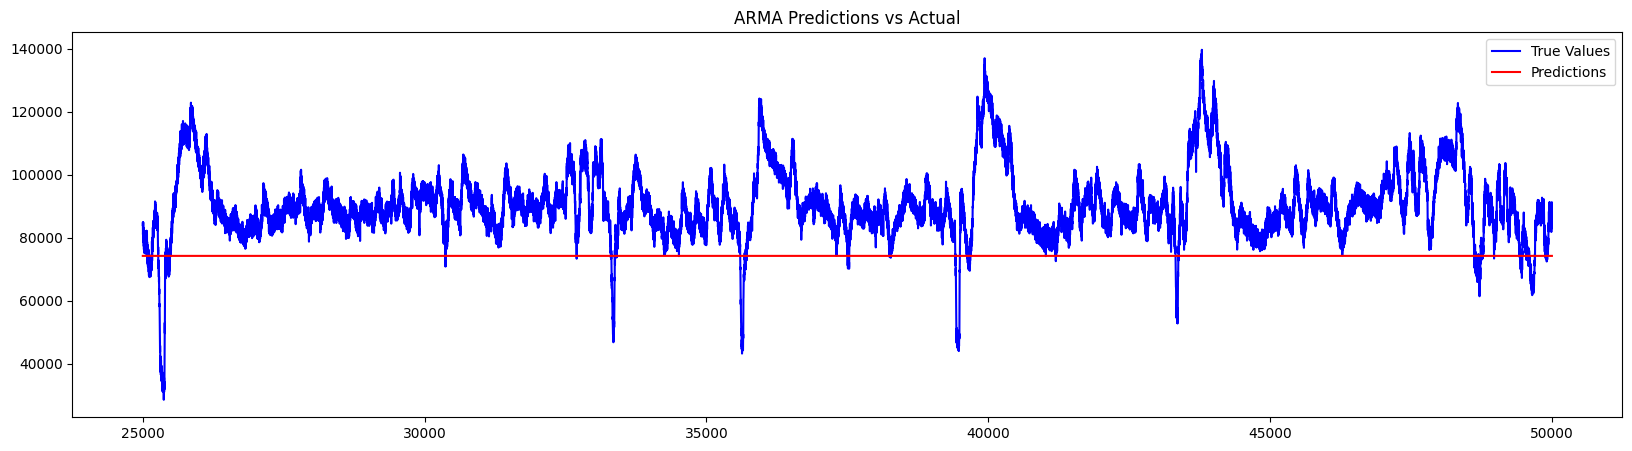

ARMA Model RMSE: 19589.8476


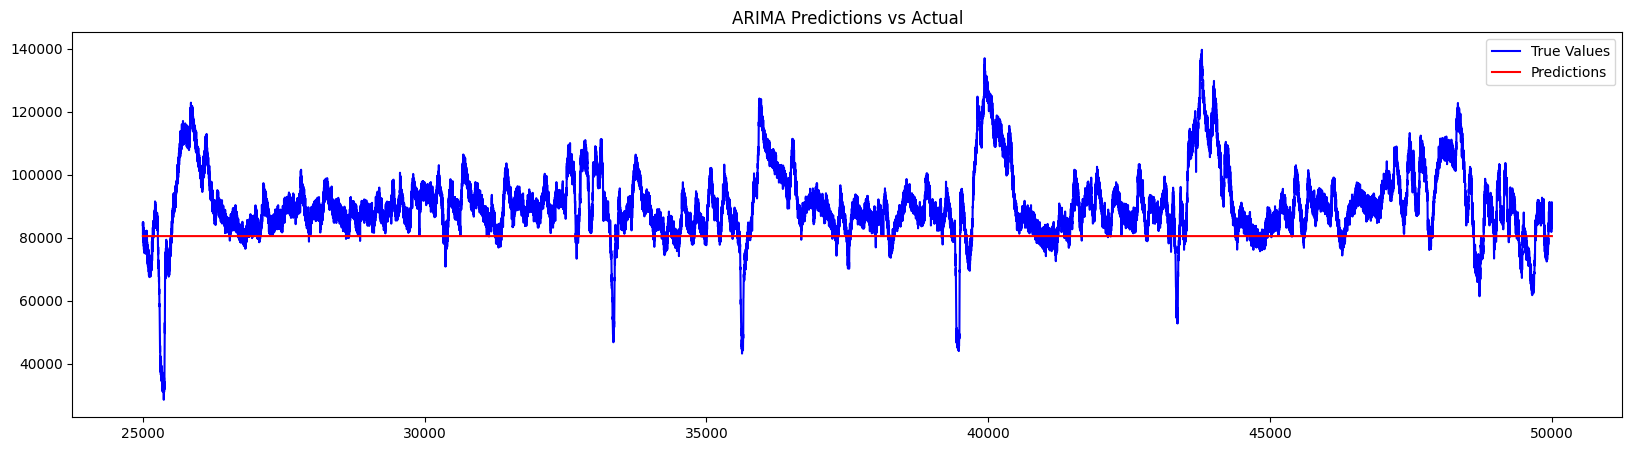

ARIMA Model RMSE: 14869.1761


In [47]:
# AR Model Prediction and Evaluation
ar_predictions = plot_predictions(test_data, ar_model, "AR")
evaluate_model(test_data, ar_predictions, "AR Model")

# MA Model Prediction and Evaluation
ma_predictions = plot_predictions(test_data, ma_model, "MA")
evaluate_model(test_data, ma_predictions, "MA Model")

# ARMA Model Prediction and Evaluation
arma_predictions = plot_predictions(test_data, arma_model, "ARMA")
evaluate_model(test_data, arma_predictions, "ARMA Model")

# ARIMA Model Prediction and Evaluation
arima_predictions = plot_predictions(test_data, arima_model, "ARIMA")
evaluate_model(test_data, arima_predictions, "ARIMA Model")
